<a href="https://colab.research.google.com/github/tlinhnguyen2308/Logic_mo/blob/master/Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic=ctrl.Antecedent(np.arange(0,10.1,0.1),'traffic')
distance=ctrl.Antecedent(np.arange(0,15.1,0.1,),'distance')
weather=ctrl.Antecedent(np.arange(0,2.1,0.1),'weather')
prep_time=ctrl.Antecedent(np.arange(0,25.1,0.1),'prep_time')
fatigue=ctrl.Antecedent(np.arange(0,10.1,0.1),'fatigue')

delivery_time=ctrl.Consequent(np.arange(0,40.1,0.1),'delivery_time')
incentive=ctrl.Consequent(np.arange(0,60.1,0.1),'incentive')
rating=ctrl.Consequent(np.arange(1,5.1,0.1),'rating')

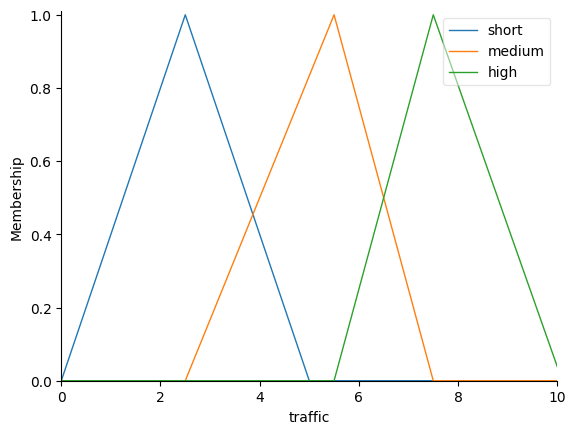

In [ ]:
traffic['short']=fuzz.trimf(traffic.universe,[0,2.5,5])
traffic['medium']=fuzz.trimf(traffic.universe,[2.5,5.5,7.5])
traffic['high']=fuzz.trimf(traffic.universe,[5.5,7.5,10.1])
distance['high']=fuzz.trimf(distance.universe,[7.5,11.25,15.1])
distance['medium']=fuzz.trimf(distance.universe,[3.75,7.5,11.25])
distance['short']=fuzz.trimf(distance.universe,[0,3.75,7.5])
weather['stormy']=fuzz.trimf(weather.universe,[1,1.5,2.1])
weather['rainy']=fuzz.trimf(weather.universe,[0.5,1,1.5])
weather['clear']=fuzz.trimf(weather.universe,[0,0.5,1])
prep_time['high']=fuzz.trimf(prep_time.universe,[0,6.25,12.5])
prep_time['medium']=fuzz.trimf(prep_time.universe,[6.25,12.5,18.75])
prep_time['short']=fuzz.trimf(prep_time.universe,[12.5,18.75,25.1])
incentive['short']=fuzz.trimf(incentive.universe,[0,15,30])
incentive['medium']=fuzz.trimf(incentive.universe,[15,30,45])
incentive['high']=fuzz.trimf(incentive.universe,[30,45,60.1])
rating['short']=fuzz.trimf(rating.universe,[1,1.025,2.05])
rating['medium']=fuzz.trimf(rating.universe,[1.025,2.05,3.075])
rating['high']=fuzz.trimf(rating.universe,[2.05,3.075,5.1])
fatigue['short']=fuzz.trimf(fatigue.universe,[0,2.5,5])
fatigue['medium']=fuzz.trimf(fatigue.universe,[2.5,5,7.5])
fatigue['high']=fuzz.trimf(fatigue.universe,[5,7.5,10.1])
delivery_time['short']=fuzz.trimf(delivery_time.universe,[0,10,20])
delivery_time['medium']=fuzz.trimf(delivery_time.universe,[10,20,30])
delivery_time['high']=fuzz.trimf(delivery_time.universe,[20,30,40.1])
traffic.view()

In [ ]:
rule1=ctrl.Rule(traffic['short'] & distance['short'], delivery_time['short'])
rule2=ctrl.Rule(traffic['medium'] & distance['medium'], delivery_time['medium'])
rule3=ctrl.Rule(traffic['high'] & distance['high'], delivery_time['high'])

rule4=ctrl.Rule(weather['clear'], incentive['short'])
rule5=ctrl.Rule(weather['rainy'], incentive['medium'])
rule6=ctrl.Rule(weather['stormy'], incentive['high'])

rule7=ctrl.Rule(prep_time['short'] & traffic['short'], delivery_time['short'])
rule8=ctrl.Rule(prep_time['medium'] & traffic['medium'], delivery_time['medium'])
rule9=ctrl.Rule(prep_time['high'] & traffic['high'], delivery_time['high'])

rule10=ctrl.Rule(fatigue['short'], rating['high'])
rule11=ctrl.Rule(fatigue['medium'], rating['medium'])
rule12=ctrl.Rule(fatigue['high'], rating['short'])

rule13=ctrl.Rule(distance['short'] & weather['clear'] & traffic['short'], (delivery_time['short'], incentive['short']))
rule14=ctrl.Rule(distance['high'] & weather['stormy'] & traffic['high'], (delivery_time['long'], incentive['high']))
rule15=ctrl.Rule(fatigue['high'] & traffic['high'], (rating['low'], delivery_time['long']))

Thời gian dự kiến: 27.137272762795696
Thưởng: 45.044880343162596
Đánh giá: 1.525


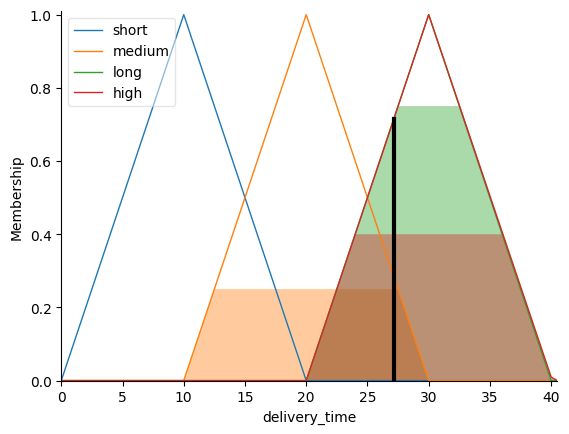

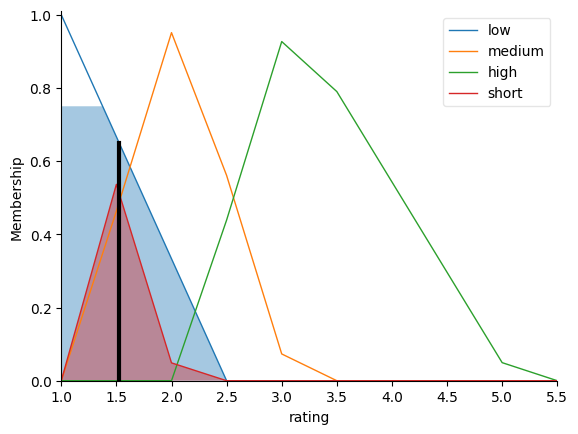

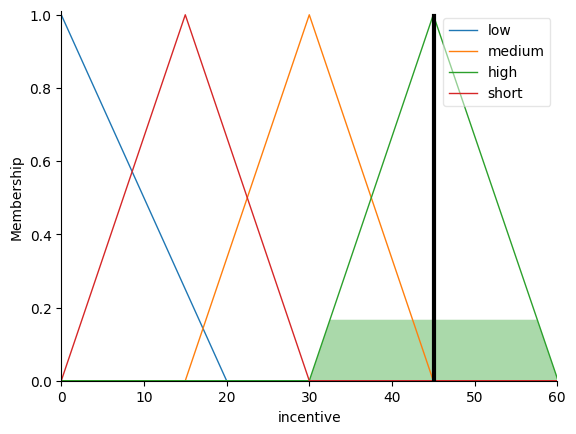

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic']=7
fuzzy_system.input['distance']=9
fuzzy_system.input['weather']=2
fuzzy_system.input['prep_time']=18
fuzzy_system.input['fatigue']=8
fuzzy_system.compute()
print("Thời gian dự kiến:", fuzzy_system.output['delivery_time'])
print("Thưởng:", fuzzy_system.output['incentive'])
print("Đánh giá:", fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 44.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
distance=ctrl.Antecedent(np.arange(0,60.1,0.1,),'distance')
traffic=ctrl.Antecedent(np.arange(0,1.1,0.1),'traffic')
level=ctrl.Antecedent(np.arange(0,1.1,0.1,),'level')
weather=ctrl.Antecedent(np.arange(0,2.1,0.1),'weather')
rating=ctrl.Antecedent(np.arange(1,5.1,0.1),'rating')
ride_unctuality=ctrl.Antecedent(np.arange(0,1.1,0.1),'ride_unctuality')

cost=ctrl.Consequent(np.arange(0,70.1,0.1,),'cost')
incentive=ctrl.Consequent(np.arange(0,60.1,0.1,),'incentive')

In [ ]:
traffic['short']=fuzz.trimf(traffic.universe,[0,0.25,0.5])
traffic['medium']=fuzz.trimf(traffic.universe,[0.25,0.5,0.75])
traffic['high']=fuzz.trimf(traffic.universe,[0.5,0.75,1.1])
distance['short']=fuzz.trimf(distance.universe,[0,10,20])
distance['medium']=fuzz.trimf(distance.universe,[10,20,35])
distance['high']=fuzz.trimf(distance.universe,[20,35,50])
distance['long']=fuzz.trimf(distance.universe,[35,50,60.1])
level['short']=fuzz.trimf(level.universe,[0,0.25,0.5])
level['medium']=fuzz.trimf(level.universe,[0.25,0.5,0.75])
level['high']=fuzz.trimf(level.universe,[0.5,0.75,1.1])
weather['good']=fuzz.trimf(weather.universe,[0,0.5,1])
weather['moderate']=fuzz.trimf(weather.universe,[0.5,1,1.5])
weather['bad']=fuzz.trimf(weather.universe,[1,1.5,2.1])
rating['bad']=fuzz.trimf(rating.universe,[1,2,3])
rating['medium']=fuzz.trimf(rating.universe,[2,3,4])
rating['good']=fuzz.trimf(rating.universe,[3.5,4,5.1])
ride_unctuality['late']=fuzz.trimf(ride_unctuality.universe,[0,0.25,0.5])
ride_unctuality['on_time']=fuzz.trimf(ride_unctuality.universe,[0.4,0.6,0.8])
ride_unctuality['early']=fuzz.trimf(ride_unctuality.universe,[0.7,0.85,1.1])
cost['short']=fuzz.trimf(cost.universe,[0,17,30])
cost['medium']=fuzz.trimf(cost.universe,[17,30,50])
cost['high']=fuzz.trimf(cost.universe,[30,50,60])
cost['long']=fuzz.trimf(cost.universe,[50,60,70.1])
incentive['none']=fuzz.trimf(incentive.universe,[0,0,0])
incentive['short']=fuzz.trimf(incentive.universe,[1,15,30])
incentive['medium']=fuzz.trimf(incentive.universe,[15,30,45])
incentive['high']=fuzz.trimf(incentive.universe,[30,45,60.1])



In [ ]:
rule1=ctrl.Rule(distance['short'] & traffic['short']&level['short'],cost['short'])
rule2=ctrl.Rule(distance['short'] & traffic['medium']&level['high'],cost['medium'])
rule3=ctrl.Rule(distance['medium'] & traffic['high']&level['high'],cost['high'])
rule4=ctrl.Rule(distance['high'] & traffic['medium']&weather['good'],cost['medium'])
rule5=ctrl.Rule(distance['high'] & traffic['high']&weather['bad'],cost['long'])
rule6=ctrl.Rule(distance['long'] & traffic['high']&level['high'],cost['long'])
rule7=ctrl.Rule(distance['medium'] & traffic['short']&level['short'],cost['medium'])
rule8=ctrl.Rule(distance['short'] & traffic['high']&weather['bad'],cost['high'])
rule9=ctrl.Rule(distance['long']& weather['bad'],cost['high'])
rule10=ctrl.Rule(distance['medium']&traffic['medium']&weather['moderate'],cost['medium'])
rule11=ctrl.Rule(rating['good']&ride_unctuality ['early'],incentive['high'])
rule12=ctrl.Rule(rating['medium']&ride_unctuality ['on_time'],incentive['medium'])
rule13=ctrl.Rule(rating['bad']&ride_unctuality ['late'],incentive['none'])
rule14=ctrl.Rule(distance['high']&traffic ['high']&ride_unctuality['on_time'],incentive['high'])
rule15=ctrl.Rule(distance['medium']&traffic ['medium']&rating['good'],incentive['medium'])
rule16=ctrl.Rule(rating['bad']&ride_unctuality ['late'],incentive['none'])
rule17=ctrl.Rule(distance['long']&weather ['bad']&rating['good'],incentive['high'])
rule18=ctrl.Rule(distance['short']&rating ['medium']&ride_unctuality['on_time'],incentive['short'])
rule19=ctrl.Rule(distance['high']&traffic ['high']&ride_unctuality['late'],incentive['short'])
rule20=ctrl.Rule(distance['medium']&weather ['moderate']&rating['good'],incentive['medium'])

Giá đi xe: 45.40404040404038
Điểm thưởng: 45.04162850440066


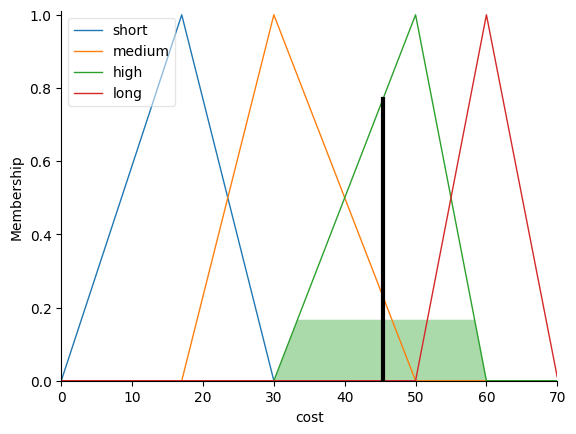

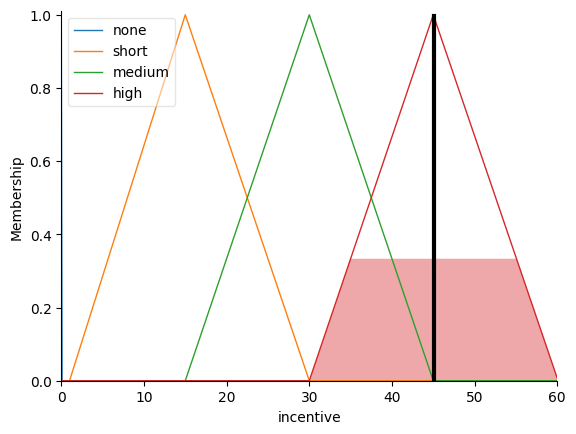

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic']=7
fuzzy_system.input['distance']=9
fuzzy_system.input['weather']=2
fuzzy_system.input['level']=0.5
fuzzy_system.input['rating']=4
fuzzy_system.input['ride_unctuality']=0.75
fuzzy_system.compute()
print("Giá đi xe:", fuzzy_system.output['cost'])
print("Điểm thưởng:", fuzzy_system.output['incentive'])
cost.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rating=ctrl.Antecedent(np.arange(1,5.1,0.1),'rating')
volume=ctrl.Antecedent(np.arange(0,60.1,0.1),'volume')
profit=ctrl.Antecedent(np.arange(0,0.8,0.1),'profit')
event=ctrl.Antecedent(np.arange(0,30.1,0.1),'event')
discount=ctrl.Antecedent(np.arange(0.1,0.7,0.1),'discount')

percent=ctrl.Consequent(np.arange(0,0.7,0.1,),'percent')

In [ ]:
rating['bad']=fuzz.trimf(rating.universe,[1,2,3])
rating['medium']=fuzz.trimf(rating.universe,[2,3,4])
rating['good']=fuzz.trimf(rating.universe,[3.5,4,5.1])
volume['low']=fuzz.trimf(volume.universe,[0,15,25])
volume['medium']=fuzz.trimf(volume.universe,[25,30,40])
volume['high']=fuzz.trimf(volume.universe,[40,50,60.1])
profit['low']=fuzz.trimf(profit.universe,[0,0.1,0.2])
profit['medium']=fuzz.trimf(profit.universe,[0.2,0.3,0.4])
profit['high']=fuzz.trimf(profit.universe,[0.5,0.6,0.8])
event['none']=fuzz.trimf(event.universe,[0,0,0])
event['medium']=fuzz.trimf(event.universe,[1,10,15])
event['high']=fuzz.trimf(event.universe,[20,25,30.1])
discount['low']=fuzz.trimf(discount.universe,[0.1,0.2,0.3])
discount['medium']=fuzz.trimf(discount.universe,[0.3,0.35,0.4])
discount['high']=fuzz.trimf(discount.universe,[0.5,0.6,0.7])
percent['very_low']=fuzz.trimf(percent.universe,[0,0.025,0.05])
percent['low']=fuzz.trimf(percent.universe,[0.05,0.075,0.1])
percent['medium']=fuzz.trimf(percent.universe,[0.1,0.15,0.2])
percent['high']=fuzz.trimf(percent.universe,[0.2,0.3,0.4])
percent['long']=fuzz.trimf(percent.universe,[0.4,0.65,0.7])

In [ ]:
rule1=ctrl.Rule(rating['good'] & volume['high']&profit['high'],percent['very_low'])
rule2=ctrl.Rule(rating['bad'] & volume['low']&profit['high'],percent['high'])
rule3=ctrl.Rule(event['high'],percent['long'])
rule4=ctrl.Rule(rating['medium'] & volume['medium']&profit['medium'],percent['medium'])
rule5=ctrl.Rule(discount['low'] & profit['low']&volume['high'],percent['very_low'])
rule6=ctrl.Rule(rating['bad'] & event['none'],percent['medium'])
rule7=ctrl.Rule(volume['low'] & profit['low'],percent['long'])


Tỷ lệ phần trăm chiết khấu: 0.5302319873931127


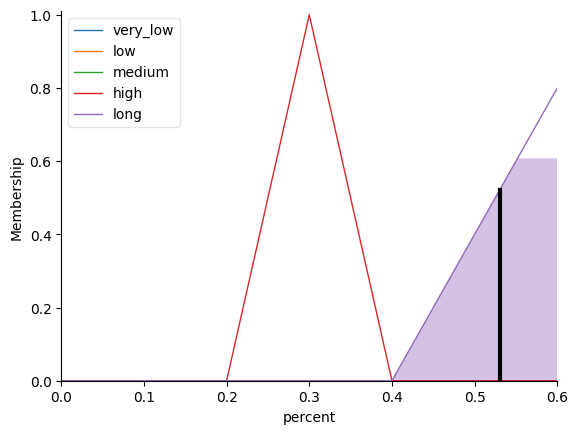

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['rating']=4.3
fuzzy_system.input['volume']=35
fuzzy_system.input['profit']=0.25
fuzzy_system.input['event']=27
fuzzy_system.input['discount']=0.65
fuzzy_system.compute()
print("Tỷ lệ phần trăm chiết khấu:", fuzzy_system.output['percent'])
percent.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,1.1,0.1),'demand')
pressure=ctrl.Antecedent(np.arange(0,1.1,0.1),'pressure')
reputation=ctrl.Antecedent(np.arange(1,5.1,0.1),'reputation')
seasonal_demand=ctrl.Antecedent(np.arange(0,1.1,0.1),'seasonal_demand')
profit=ctrl.Antecedent(np.arange(0,0.8,0.1),'profit')

discount=ctrl.Consequent(np.arange(0,0.7,0.1,),'discount')

In [ ]:
demand['low']=fuzz.trimf(demand.universe,[0,0.2,0.3])
demand['medium']=fuzz.trimf(demand.universe,[0.3,0.5,0.6])
demand['high']=fuzz.trimf(demand.universe,[0.7,0.85,1.1])
pressure['low']=fuzz.trimf(pressure.universe,[0,0.25,0.4])
pressure['medium']=fuzz.trimf(pressure.universe,[0.5,0.6,0.7])
pressure['high']=fuzz.trimf(pressure.universe,[0.7,0.85,1.1])
pressure['low']=fuzz.trimf(pressure.universe,[0,0.2,0.3])
reputation['low']=fuzz.trimf(reputation.universe,[1,2.5,4])
reputation['medium']=fuzz.trimf(reputation.universe,[4,4.25,4.5])
reputation['high']=fuzz.trimf(reputation.universe,[4.5,4.8,5.1])
profit['low']=fuzz.trimf(profit.universe,[0,0.2,0.3])
profit['medium']=fuzz.trimf(profit.universe,[0.3,0.4,0.5])
profit['high']=fuzz.trimf(profit.universe,[0.5,0.7,0.8])
seasonal_demand['none']=fuzz.trimf(seasonal_demand.universe,[0,0,0])
seasonal_demand['medium']=fuzz.trimf(seasonal_demand.universe,[0.3,0.4,0.6])
seasonal_demand['high']=fuzz.trimf(seasonal_demand.universe,[0.6,0.85,1.1])
discount['very_low']=fuzz.trimf(discount.universe,[0,0.025,0.05])
discount['low']=fuzz.trimf(discount.universe,[0.05,0.075,0.1])
discount['medium']=fuzz.trimf(discount.universe,[0.1,0.15,0.2])
discount['high']=fuzz.trimf(discount.universe,[0.2,0.3,0.4])
discount['long']=fuzz.trimf(discount.universe,[0.4,0.55,0.7])


In [ ]:
rule1=ctrl.Rule(demand['high'] & pressure['low']&profit['low'],discount['very_low'])
rule2=ctrl.Rule(demand['low'] & pressure['high']&profit['high'],discount['high'])
rule3=ctrl.Rule(reputation['high'] & profit['medium']&seasonal_demand['high'],discount['medium'])
rule4=ctrl.Rule(pressure['high'] & seasonal_demand['high']&profit['high'],discount['long'])
rule5=ctrl.Rule(reputation['low'] & demand['medium']&profit['low'],discount['medium'])
rule6=ctrl.Rule(demand['high'] & seasonal_demand['none']&pressure['low'],discount['very_low'])
rule7=ctrl.Rule(profit['high'] &pressure['medium']& seasonal_demand['medium'],discount['medium'])

Mức giảm giá áp dụng: 0.16666666666666652


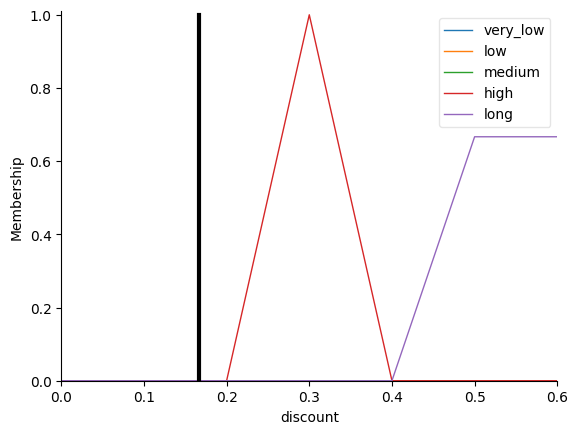

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand']=0.8
fuzzy_system.input['pressure']=0.65
fuzzy_system.input['reputation']=4.2
fuzzy_system.input['profit']=0.75
fuzzy_system.input['seasonal_demand']=0.9
fuzzy_system.compute()
print("Mức giảm giá áp dụng:", fuzzy_system.output['discount'])
discount.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
order=ctrl.Antecedent(np.arange(0,1.1,0.1),'order')
urgency=ctrl.Antecedent(np.arange(0,1.1,0.1),'urgency')
load=ctrl.Antecedent(np.arange(0,1.1,0.1),'load')
traffic=ctrl.Antecedent(np.arange(0,1.1,0.1),'traffic')
profit=ctrl.Antecedent(np.arange(0,1.1,0.1),'profit')
combine = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'combine')
priority=ctrl.Consequent(np.arange(0,1.1,0.1,),'priority')

In [ ]:
order['low']=fuzz.trimf(order.universe,[0,0.2,0.5])
order['medium']=fuzz.trimf(order.universe,[0.2,0.5,0.8])
order['high']=fuzz.trimf(order.universe,[0.5,0.8,1.1])
urgency['low']=fuzz.trimf(urgency.universe,[0,0.2,0.5])
urgency['medium']=fuzz.trimf(urgency.universe,[0.2,0.5,0.8])
urgency['high']=fuzz.trimf(urgency.universe,[0.5,0.8,1.1])
load['low']=fuzz.trimf(load.universe,[0,0.2,0.5])
load['medium']=fuzz.trimf(load.universe,[0.2,0.5,0.8])
load['high']=fuzz.trimf(load.universe,[0.5,0.8,1.1])
traffic['low']=fuzz.trimf(traffic.universe,[0,0.2,0.5])
traffic['medium']=fuzz.trimf(traffic.universe,[0.2,0.5,0.8])
traffic['high']=fuzz.trimf(traffic.universe,[0.5,0.8,1.1])
profit['low']=fuzz.trimf(profit.universe,[0,0.2,0.5])
profit['medium']=fuzz.trimf(profit.universe,[0.2,0.5,0.8])
profit['high']=fuzz.trimf(profit.universe,[0.5,0.8,1.1])
combine['low']=fuzz.trimf(combine.universe,[0,0.2,0.5])
combine['medium']=fuzz.trimf(combine.universe,[0.2,0.5,0.8])
combine['high']=fuzz.trimf(combine.universe,[0.5,0.8,1.1])
priority['low']=fuzz.trimf(priority.universe,[0,0.2,0.5])
priority['medium']=fuzz.trimf(priority.universe,[0.2,0.5,0.8])
priority['high']=fuzz.trimf(priority.universe,[0.5,0.8,1.1])


In [ ]:
rule1=ctrl.Rule(order['high'] & load['low']&traffic['low'],combine['high'])
rule2=ctrl.Rule(order['medium'] & traffic['high']&urgency['medium'],combine['low'])
rule3=ctrl.Rule(load['high'] & order['high']&profit['medium'],combine['medium'])
rule4=ctrl.Rule(order['low'] & urgency['high']&traffic['medium'],combine['low'])
rule5=ctrl.Rule(order['high'] &urgency['high']& traffic['high'],combine['low'])
rule6=ctrl.Rule(urgency['high'] & profit['high'],priority['high'])
rule7=ctrl.Rule(urgency['medium'] & traffic['medium'],priority['medium'])
rule8=ctrl.Rule(urgency['low'] & order['high']&profit['low'],priority['low'])


Số lượng đơn hàng cần kết hợp: 0.24222222222222223
Ưu tiên giao hàng: 0.5


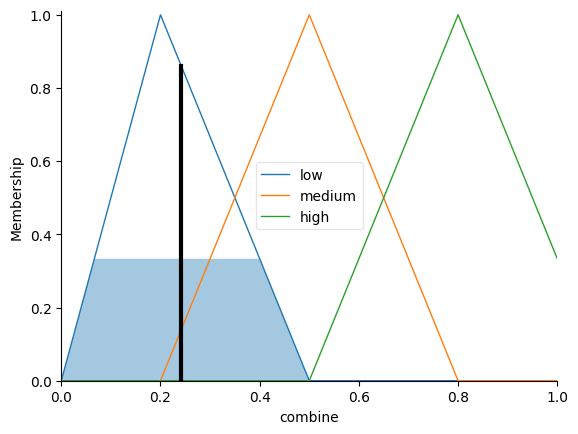

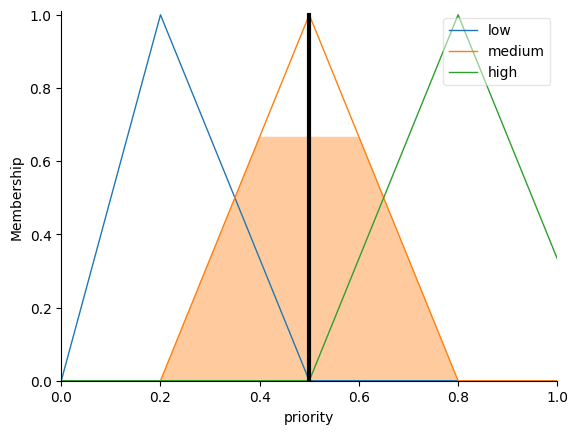

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['order']=0.8
fuzzy_system.input['urgency']=0.6
fuzzy_system.input['load']=0.3
fuzzy_system.input['traffic']=0.6
fuzzy_system.input['profit']=0.5
fuzzy_system.compute()
print("Số lượng đơn hàng cần kết hợp:", fuzzy_system.output['combine'])
print("Ưu tiên giao hàng:", fuzzy_system.output['priority'])
combine.view(sim=fuzzy_system)
priority.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
blood_sugar=ctrl.Antecedent(np.arange(0,250,0.1),'blood_sugar')
body=ctrl.Antecedent(np.arange(0,35,0.1),'body')
urination=ctrl.Antecedent(np.arange(0,1.1,0.1),'urination')
level=ctrl.Antecedent(np.arange(0,1.1,0.1),'level')

risk=ctrl.Consequent(np.arange(0,1.1,0.1,),'risk')

In [ ]:
blood_sugar['low']=fuzz.trimf(blood_sugar.universe,[0,40,80])
blood_sugar['medium']=fuzz.trimf(blood_sugar.universe,[40,80,120])
blood_sugar['high']=fuzz.trimf(blood_sugar.universe,[80,120,200])
blood_sugar['very_high']=fuzz.trimf(blood_sugar.universe,[120,200,250])
body['low']=fuzz.trimf(body.universe,[0,9,18.5])
body['medium']=fuzz.trimf(body.universe,[9,18.5,24.9])
body['high']=fuzz.trimf(body.universe,[18.5,25,29.9])
body['very_high']=fuzz.trimf(body.universe,[25,29.9,35])
urination['low']=fuzz.trimf(urination.universe,[0,0.2,0.4])
urination['medium']=fuzz.trimf(urination.universe,[0.2,0.4,0.7])
urination['high']=fuzz.trimf(urination.universe,[0.4,0.7,1.1])
risk['low']=fuzz.trimf(risk.universe,[0,0.1,0.3])
risk['medium']=fuzz.trimf(risk.universe,[0.1,0.3,0.6])
risk['high']=fuzz.trimf(risk.universe,[0.3,0.6,0.8])
risk['very_high']=fuzz.trimf(risk.universe,[0.6,0.8,1.1])
level['low']=fuzz.trimf(level.universe,[0,0.2,0.5])
level['medium']=fuzz.trimf(level.universe,[0.2,0.5,0.8])
level['high']=fuzz.trimf(level.universe,[0.5,0.8,1.1])

In [ ]:
rule1=ctrl.Rule(blood_sugar['very_high'] & urination['high'],risk['very_high'])
rule2=ctrl.Rule(blood_sugar['very_high'] & urination['medium'],risk['high'])
rule3=ctrl.Rule(blood_sugar['high'] & urination['high'],risk['high'])
rule4=ctrl.Rule(blood_sugar['medium'] & urination['low'],risk['low'])

rule5=ctrl.Rule(blood_sugar['very_high'] & body['very_high'],risk['very_high'])
rule6=ctrl.Rule(blood_sugar['very_high'] & body['high'],risk['high'])
rule7=ctrl.Rule(blood_sugar['high'] & body['high'],risk['high'])
rule8=ctrl.Rule(blood_sugar['medium'] & body['medium'],risk['low'])

rule9=ctrl.Rule(blood_sugar['very_high'] & level['high'],risk['very_high'])
rule10=ctrl.Rule(blood_sugar['high'] & level['high'],risk['high'])
rule11=ctrl.Rule(blood_sugar['high'] & level['medium'],risk['medium'])
rule12=ctrl.Rule(blood_sugar['medium'] & level['low'],risk['low'])


Độ nguy hiểm: 0.26682587309394984


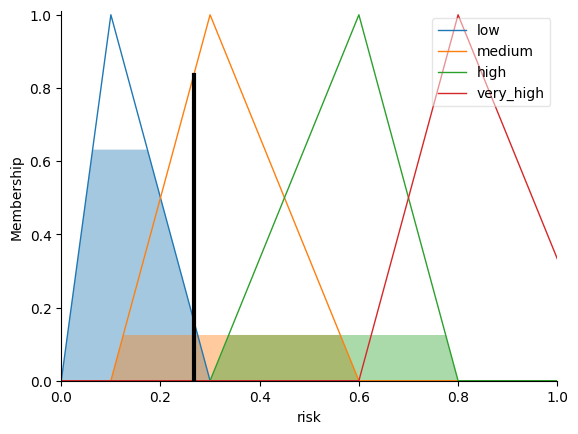

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9, rule10, rule11, rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['blood_sugar']=85
fuzzy_system.input['body']=15
fuzzy_system.input['urination']=0.4
fuzzy_system.input['level']=0.6
fuzzy_system.compute()
print("Độ nguy hiểm:", fuzzy_system.output['risk'])
risk.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,1.1,0.1),'demand')
pricing=ctrl.Antecedent(np.arange(0,1.1,0.1),'pricing')
cost=ctrl.Antecedent(np.arange(0,1.1,0.1),'cost')
seasonality=ctrl.Antecedent(np.arange(0,1.1,0.1),'seasonality')
level=ctrl.Antecedent(np.arange(0,1.1,0.1),'level')

final_price=ctrl.Consequent(np.arange(0,1.1,0.1,),'final_price')

In [ ]:
demand['very_low']=fuzz.trimf(demand.universe,[0,0.2,0.3])
demand['low']=fuzz.trimf(demand.universe,[0.2,0.3,0.5])
demand['medium']=fuzz.trimf(demand.universe,[0.3,0.5,0.8])
demand['high']=fuzz.trimf(demand.universe,[0.5,0.8,1.1])
pricing['very_low']=fuzz.trimf(pricing.universe,[0,0.2,0.3])
pricing['low']=fuzz.trimf(pricing.universe,[0.2,0.3,0.4])
pricing['medium']=fuzz.trimf(pricing.universe,[0.3,0.4,0.75])
pricing['high']=fuzz.trimf(pricing.universe,[0.4,0.75,1.1])
cost['low']=fuzz.trimf(cost.universe,[0,0.2,0.4])
cost['medium']=fuzz.trimf(cost.universe,[0.2,0.4,0.75])
cost['high']=fuzz.trimf(cost.universe,[0.4,0.75,1.1])
seasonality['low']=fuzz.trimf(seasonality.universe,[0,0.2,0.35])
seasonality['medium']=fuzz.trimf(seasonality.universe,[0.2,0.35,0.7])
seasonality['high']=fuzz.trimf(seasonality.universe,[0.35,0.7,1.1])
level['low']=fuzz.trimf(level.universe,[0,0.2,0.5])
level['medium']=fuzz.trimf(level.universe,[0.2,0.5,0.8])
level['high']=fuzz.trimf(level.universe,[0.5,0.7,0.8])
level['very_high']=fuzz.trimf(level.universe,[0.7,0.8,1.1])
final_price['low']=fuzz.trimf(final_price.universe,[0.1,0.3,0.4])
final_price['very_low']=fuzz.trimf(final_price.universe,[0.2,0.3,0.5])
final_price['medium']=fuzz.trimf(final_price.universe,[0,0.1,0.3])
final_price['high']=fuzz.trimf(final_price.universe,[0.3,0.5,0.7])
final_price['very_high']=fuzz.trimf(final_price.universe,[0.5,0.7,1.1])

In [ ]:
rule1=ctrl.Rule(demand['high'] & pricing['high']&level['low'],final_price['very_high'])
rule2=ctrl.Rule(demand['high'] & seasonality['high']&level['low'],final_price['very_high'])
rule3=ctrl. Rule(demand['medium'] & cost['high']&level['low'],final_price['very_high'])
rule4=ctrl.Rule(demand['high'] & pricing['medium']&level['medium'],final_price['high'])
rule5=ctrl.Rule(demand['medium'] & pricing['high']&level['low'],final_price['high'])
rule6=ctrl.Rule(demand['high'] & seasonality['high']&level['medium'],final_price['high'])
rule7=ctrl.Rule(demand['medium'] & pricing['medium']&level['medium'],final_price['medium'])
rule8=ctrl.Rule(demand['low'] & pricing['high']&level['medium'],final_price['medium'])
rule9=ctrl.Rule(demand['medium'] & cost['medium']&level['medium'],final_price['medium'])
rule10=ctrl.Rule(demand['low'] & pricing['low']&level['high'],final_price['low'])
rule11=ctrl.Rule(demand['medium'] & cost['low']&level['high'],final_price['low'])
rule12=ctrl.Rule(demand['low'] & seasonality['low']&level['high'],final_price['low'])
rule13=ctrl.Rule(demand['low'] & pricing['low']&level['very_high'],final_price['very_low'])
rule14=ctrl.Rule(demand['medium'] & pricing['very_low']&level['very_high'],final_price['very_low'])
rule15=ctrl.Rule(demand['medium'] & pricing['very_low']&level['very_high'],final_price['very_low'])
rule16=ctrl.Rule(demand['very_low'] & seasonality['low']&level['very_high'],final_price['very_low'])



Giá cuối cùng: 0.3015151515151515


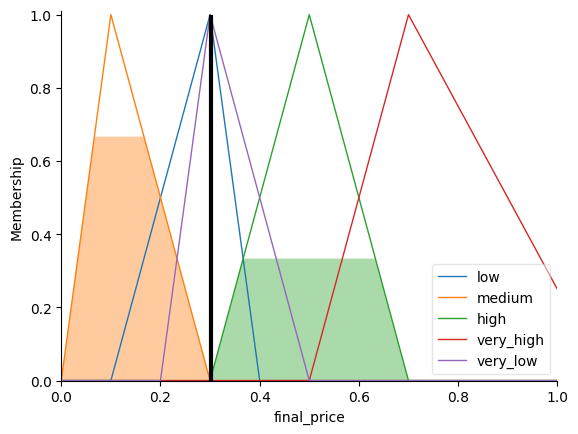

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand']=0.6
fuzzy_system.input['pricing']=0.3
fuzzy_system.input['cost']=0.4
fuzzy_system.input['seasonality']=0.6
fuzzy_system.input['level']=0.5
fuzzy_system.compute()
print("Giá cuối cùng:", fuzzy_system.output['final_price'])
final_price.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,1.1,0.1),'load')
level=ctrl.Antecedent(np.arange(0,1.1,0.1),'level')
types=ctrl.Antecedent(np.arange(0,1.1,0.1),'types')

time=ctrl.Consequent(np.arange(0,1.1,0.1,),'time')
water=ctrl.Consequent(np.arange(0,1.1,0.1,),'water')

In [ ]:
load['low']=fuzz.trimf(load.universe,[0,0.2,0.5])
load['medium']=fuzz.trimf(load.universe,[0.2,0.5,0.8])
load['high']=fuzz.trimf(load.universe,[0.5,0.8,1.1])
level['low']=fuzz.trimf(level.universe,[0,0.2,0.5])
level['medium']=fuzz.trimf(level.universe,[0.2,0.5,0.7])
level['high']=fuzz.trimf(level.universe,[0.5,0.7,1.1])
types['low']=fuzz.trimf(types.universe,[0,0.2,0.4])
types['medium']=fuzz.trimf(types.universe,[0.2,0.4,0.75])
types['high']=fuzz.trimf(types.universe,[0.4,0.75,1.1])
time['very_low']=fuzz.trimf(time.universe,[0,0.1,0.3])
time['low']=fuzz.trimf(time.universe,[0.1,0.3,0.4])
time['medium']=fuzz.trimf(time.universe,[0.2,0.4,0.7])
time['high']=fuzz.trimf(time.universe,[0.4,0.7,0.9])
time['very_high']=fuzz.trimf(time.universe,[0.7,0.9,1.1])
water['low']=fuzz.trimf(water.universe,[0,0.2,0.4])
water['medium']=fuzz.trimf(water.universe,[0.2,0.4,0.7])
water['high']=fuzz.trimf(water.universe,[0.4,0.7,0.9])
water['very_high']=fuzz.trimf(water.universe,[0.7,0.9,1.1])


In [ ]:
rule1=ctrl.Rule(load['low'] & level['low'],time['low'])
rule2=ctrl.Rule(load['low'] & level['low'],water['low'])
rule3=ctrl.Rule(load['low'] & level['medium'],time['medium'])
rule4=ctrl.Rule(load['low'] & level['medium'],water['medium'])
rule5=ctrl.Rule(load['low'] & level['high'],time['high'])
rule6=ctrl.Rule(load['low'] & level['high'],water['medium'])
rule7=ctrl.Rule(load['medium'] & level['low'],time['medium'])
rule8=ctrl.Rule(load['medium'] & level['low'],water['medium'])
rule9=ctrl.Rule(load['medium'] & level['medium'],time['high'])
rule10=ctrl.Rule(load['medium'] & level['medium'],water['medium'])
rule11=ctrl.Rule(load['medium'] & level['high'],time['high'])
rule12=ctrl.Rule(load['medium'] & level['high'],water['high'])
rule13=ctrl.Rule(load['high'] & level['low'],time['high'])
rule14=ctrl.Rule(load['high'] & level['low'],water['high'])
rule15=ctrl.Rule(load['high'] & level['medium'],time['high'])
rule16=ctrl.Rule(load['high'] & level['medium'],water['high'])
rule17=ctrl.Rule(load['high'] & level['high'],time['high'])
rule18=ctrl.Rule(load['high'] & level['high'],water['high'])


rule19=ctrl.Rule(types['low'] &time['low'],water['low'])
rule20=ctrl.Rule(types['medium'] &time['medium'],water['medium'])
rule21=ctrl.Rule(types['high'] &time['high'],water['high'])

rule22=ctrl.Rule(load['high'] &level['high']&types['high'],time['very_high'])
rule23=ctrl.Rule(load['high'] &level['high']&types['high'],water['very_high'])
rule24=ctrl.Rule(load['low'] &level['low']&types['low'],time['very_low'])
rule25=ctrl.Rule(load['low'] &level['low']&types['low'],water['low'])
rule26=ctrl.Rule(load['medium'] &level['medium']&types['medium'],time['medium'])
rule27=ctrl.Rule(load['medium'] &level['medium']&types['medium'],water['medium'])



Thời gian giặt: 0.5148846960167714
Chất lượng nước: 0.5148846960167713


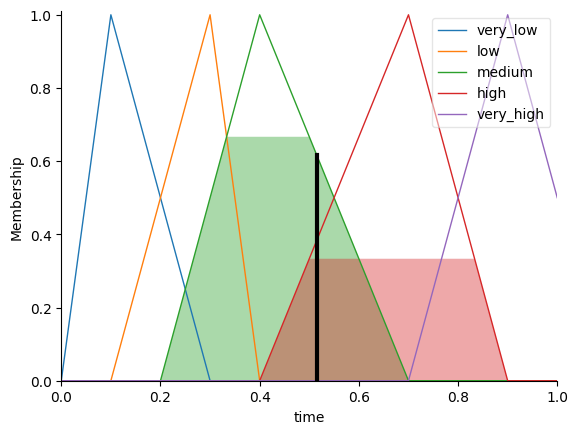

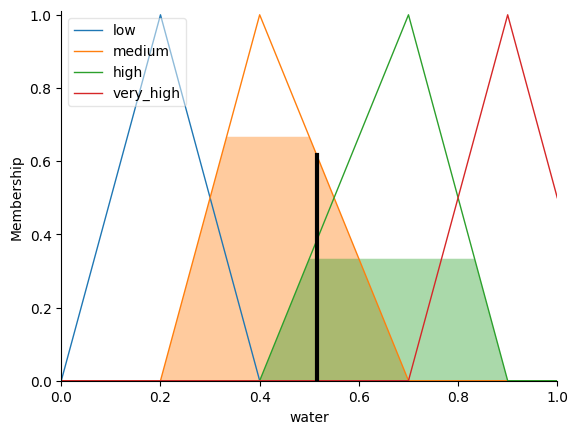

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9, rule10, rule11,rule12, rule13, rule14, rule15,rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['load']=0.6
fuzzy_system.input['level']=0.3
fuzzy_system.input['types']=0.5
fuzzy_system.compute()
print("Thời gian giặt:", fuzzy_system.output['time'])
print("Chất lượng nước:", fuzzy_system.output['water'])
time.view(sim=fuzzy_system)
water.view(sim=fuzzy_system)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature=ctrl.Antecedent(np.arange(0,1.1,0.1),'temperature')
level=ctrl.Antecedent(np.arange(0,1.1,0.1),'level')
people=ctrl.Antecedent(np.arange(0,1.1,0.1),'people')

fan=ctrl.Consequent(np.arange(0,1.1,0.1,),'fan')
cooling=ctrl.Consequent(np.arange(0,1.1,0.1,),'cooling')

In [ ]:
temperature['very_low']=fuzz.trimf(temperature.universe,[0,0.1,0.3])
temperature['low']=fuzz.trimf(temperature.universe,[0.1,0.3,0.5])
temperature['medium']=fuzz.trimf(temperature.universe,[0.3,0.5,0.7])
temperature['high']=fuzz.trimf(temperature.universe,[0.5,0.7,0.9])
temperature['very_high']=fuzz.trimf(temperature.universe,[0.7,0.9,1.1])
level['low']=fuzz.trimf(level.universe,[0,0.1,0.4])
level['medium']=fuzz.trimf(level.universe,[0.1,0.4,0.8])
level['high']=fuzz.trimf(level.universe,[0.4,0.8,1.1])
people['low']=fuzz.trimf(people.universe,[0,0.2,0.5])
people['medium']=fuzz.trimf(people.universe,[0.2,0.5,0.7])
people['high']=fuzz.trimf(people.universe,[0.5,0.7,1.1])
fan['low']=fuzz.trimf(fan.universe,[0,0.1,0.3])
fan['medium']=fuzz.trimf(fan.universe,[0.1,0.3,0.8])
fan['high']=fuzz.trimf(fan.universe,[0.3,0.8,1.1])
cooling['low']=fuzz.trimf(cooling.universe,[0,0.2,0.5])
cooling['medium']=fuzz.trimf(cooling.universe,[0.2,0.5,0.8])
cooling['high']=fuzz.trimf(cooling.universe,[0.5,0.8,1.1])


In [ ]:
rule1=ctrl.Rule(temperature['very_low'],fan['low'])
rule2=ctrl.Rule(temperature['low'],fan['low'])
rule3=ctrl.Rule(temperature['medium'],fan['medium'])
rule4=ctrl.Rule(temperature['high'],fan['high'])
rule5=ctrl.Rule(temperature['very_high'],fan['high'])

rule6=ctrl.Rule(level['medium'],cooling['medium'])
rule7=ctrl.Rule(level['high'],cooling['high'])

rule8=ctrl.Rule(temperature['very_low'],cooling['low'])
rule9=ctrl.Rule(temperature['low'],cooling['low'])
rule10=ctrl.Rule(temperature['medium'],cooling['medium'])
rule11=ctrl.Rule(temperature['high'],cooling['high'])
rule12=ctrl.Rule(temperature['very_high'],cooling['high'])

rule13=ctrl.Rule(people['low'],fan['low'])
rule14=ctrl.Rule(people['medium'],cooling['medium'])
rule15=ctrl.Rule(people['high'],cooling['high'])

rule16=ctrl.Rule(temperature['very_high']&level['high']&people['high'],cooling['high'],fan['high'])
rule17=ctrl.Rule(temperature['medium']&level['medium']&people['medium'],cooling['medium'],fan['medium'])
rule18=ctrl.Rule(temperature['high']&level['low']&people['low'],cooling['low'],fan['low'])




Tốc độ quạt: 0.5704620462046204
Mức độ làm mát: 0.6092948717948719


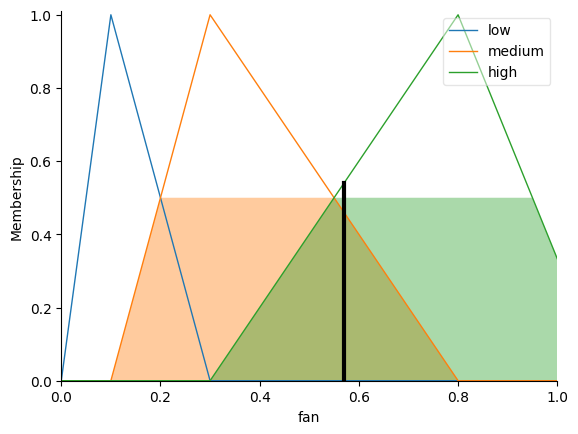

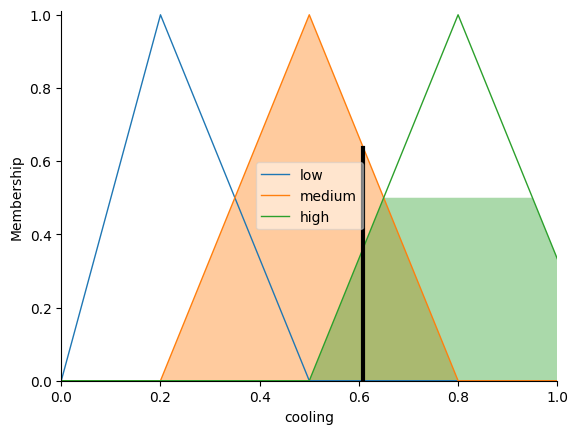

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9, rule10, rule11,rule12, rule13, rule14, rule15,rule16, rule17, rule18])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['temperature']=0.6
fuzzy_system.input['level']=0.3
fuzzy_system.input['people']=0.5
fuzzy_system.compute()
print("Tốc độ quạt:", fuzzy_system.output['fan'])
print("Mức độ làm mát:", fuzzy_system.output['cooling'])
fan.view(sim=fuzzy_system)
cooling.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
weight=ctrl.Antecedent(np.arange(0,1.1,0.1),'weight')
types=ctrl.Antecedent(np.arange(0,1.1,0.1),'types')
temperature=ctrl.Antecedent(np.arange(0,60,0.1),'temperature')

cooking=ctrl.Consequent(np.arange(0,1.1,0.1,),'cooking')
capacity=ctrl.Consequent(np.arange(0,1.1,0.1,),'capacity')

In [ ]:
weight['low']=fuzz.trimf(weight.universe,[0,0.2,0.4])
weight['medium']=fuzz.trimf(weight.universe,[0.2,0.4,0.8])
weight['high']=fuzz.trimf(weight.universe,[0.4,0.8,1.1])
types['low']=fuzz.trimf(types.universe,[0,0.3,0.5])
types['medium']=fuzz.trimf(types.universe,[0.3,0.5,0.75])
types['high']=fuzz.trimf(types.universe,[0.5,0.75,1.1])
temperature['low']=fuzz.trimf(temperature.universe,[0,5,10])
temperature['medium']=fuzz.trimf(temperature.universe,[5,10,30])
temperature['high']=fuzz.trimf(temperature.universe,[10,30,60])
cooking['low']=fuzz.trimf(cooking.universe,[0,0.3,0.5])
cooking['medium']=fuzz.trimf(cooking.universe,[0.3,0.5,0.8])
cooking['high']=fuzz.trimf(cooking.universe,[0.5,0.8,1.1])
capacity['low']=fuzz.trimf(capacity.universe,[0,0.25,0.6])
capacity['medium']=fuzz.trimf(capacity.universe,[0.25,0.6,0.9])
capacity['high']=fuzz.trimf(capacity.universe,[0.6,0.9,1.1])



In [ ]:
rule1 = ctrl.Rule(weight['low'], cooking['low'])
rule2 = ctrl.Rule(weight['medium'], cooking['medium'])
rule3 = ctrl.Rule(weight['high'], cooking['high'])
rule4 = ctrl.Rule(types['low'], capacity['low'])
rule5 = ctrl.Rule(types['medium'], capacity['medium'])
rule6 = ctrl.Rule(types['high'], capacity['high'])
rule7 = ctrl.Rule(temperature['low'], cooking['high'])
rule8 = ctrl.Rule(temperature['medium'], cooking['medium'])
rule9 = ctrl.Rule(temperature['high'], cooking['low'])
rule10 = ctrl.Rule(weight['high'] & types['high'] & temperature['low'], cooking['high'])
rule11 = ctrl.Rule(weight['medium'] & types['low'] & temperature['medium'], cooking['medium'])
rule12 = ctrl.Rule(weight['low'] & types['medium'] & temperature['high'], cooking['low'])


Thời gian nấu: 0.5145696400625978
Mức công suất: 0.28431372549019635


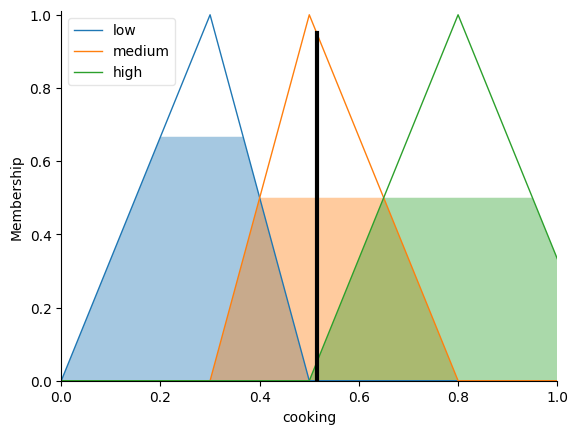

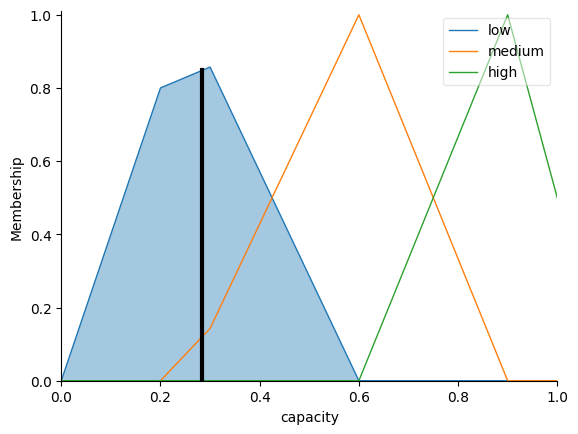

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight']=0.6
fuzzy_system.input['types']=0.3
fuzzy_system.input['temperature']=40
fuzzy_system.compute()
print("Thời gian nấu:", fuzzy_system.output['cooking'])
print("Mức công suất:", fuzzy_system.output['capacity'])
cooking.view(sim=fuzzy_system)
capacity.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
types=ctrl.Antecedent(np.arange(0,1.1,0.1),'types')
weight=ctrl.Antecedent(np.arange(0,1.1,0.1),'weight')
temperature=ctrl.Antecedent(np.arange(0,60,0.1),'temperature')
water=ctrl.Antecedent(np.arange(0,1.1,0.1),'water')

time=ctrl.Consequent(np.arange(0,1.1,0.1,),'time')
level=ctrl.Consequent(np.arange(0,1.1,0.1,),'level')

In [ ]:
types['low']=fuzz.trimf(types.universe,[0,0.3,0.5])
types['medium']=fuzz.trimf(types.universe,[0.3,0.5,0.8])
types['high']=fuzz.trimf(types.universe,[0.5,0.8,1.1])
weight['low']=fuzz.trimf(weight.universe,[0,0.3,0.5])
weight['medium']=fuzz.trimf(weight.universe,[0.3,0.5,0.75])
weight['high']=fuzz.trimf(weight.universe,[0.5,0.75,1.1])
temperature['low']=fuzz.trimf(temperature.universe,[0,5,10])
temperature['medium']=fuzz.trimf(temperature.universe,[5,10,30])
temperature['high']=fuzz.trimf(temperature.universe,[10,30,60])
water['low']=fuzz.trimf(water.universe,[0,0.3,0.6])
water['medium']=fuzz.trimf(water.universe,[0.3,0.6,0.9])
water['high']=fuzz.trimf(water.universe,[0.6,0.9,1.1])
time['low']=fuzz.trimf(time.universe,[0,0.3,0.55])
time['medium']=fuzz.trimf(time.universe,[0.3,0.55,0.9])
time['high']=fuzz.trimf(time.universe,[0.55,0.9,1.1])
level['low']=fuzz.trimf(level.universe,[0,0.15,0.3])
level['medium']=fuzz.trimf(level.universe,[0.15,0.3,0.6])
level['high']=fuzz.trimf(level.universe,[0.3,0.6,1.1])

In [ ]:
rule1 = ctrl.Rule(weight['low'], time['low'])
rule2 = ctrl.Rule(weight['medium'], time['medium'])
rule3 = ctrl.Rule(weight['high'], time['high'])
rule4 = ctrl.Rule(types['low'], level['low'])
rule5 = ctrl.Rule(types['medium'], level['medium'])
rule6 = ctrl.Rule(types['high'], level['high'])
rule7 = ctrl.Rule(temperature['low'], time['high'])
rule8 = ctrl.Rule(temperature['medium'], time['medium'])
rule9 = ctrl.Rule(temperature['high'], time['low'])
rule10 = ctrl.Rule(water['high'], level['high'])
rule11 = ctrl.Rule(water['medium'], level['medium'])
rule12 = ctrl.Rule(water['low'], level['low'])

rule13 = ctrl.Rule(weight['high'] & types['high'] & temperature['low']&water['high'], cooking['high'])
rule14 = ctrl.Rule(weight['medium'] & types['low'] & temperature['medium']&water['medium'], cooking['medium'])
rule15 = ctrl.Rule(weight['low'] & types['medium'] & temperature['high']&water['low'], cooking['low'])


Thời gian nấu: 0.5037793613090525
Mức công suất: 0.2777777777777778


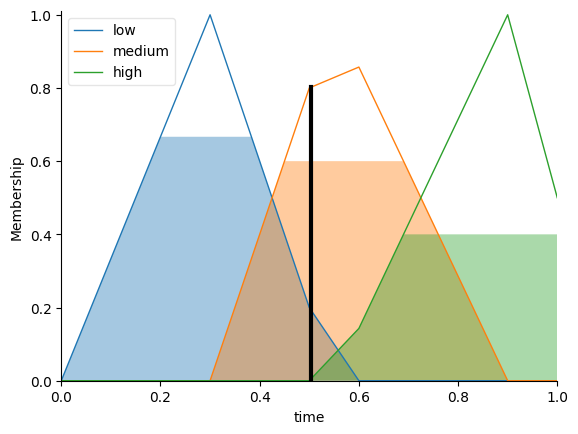

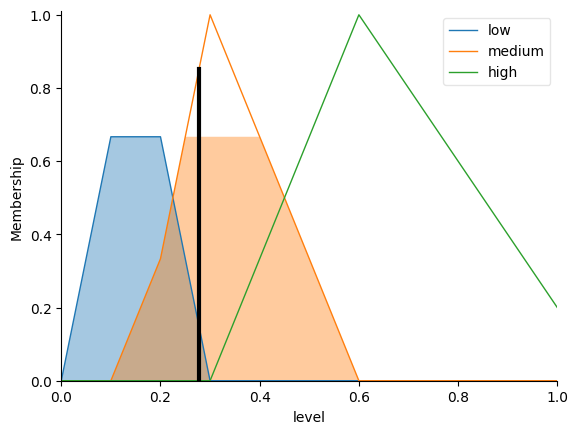

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight']=0.6
fuzzy_system.input['types']=0.3
fuzzy_system.input['temperature']=40
fuzzy_system.input['water']=0.5
fuzzy_system.compute()
print("Thời gian nấu:", fuzzy_system.output['time'])
print("Mức công suất:", fuzzy_system.output['level'])
time.view(sim=fuzzy_system)
level.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
heart=ctrl.Antecedent(np.arange(0,120,0.1),'heart')
blood=ctrl.Antecedent(np.arange(50,181,0.1),'blood')
temperature=ctrl.Antecedent(np.arange(0,41,0.1),'temperature')
oxygen=ctrl.Antecedent(np.arange(0,1.1,0.1),'oxygen')
blood_sugar=ctrl.Antecedent(np.arange(0,200,0.1),'blood_sugar')

medicine=ctrl.Consequent(np.arange(0,1.1,0.1,),'medicine')
adjust=ctrl.Consequent(np.arange(0,1.1,0.1,),'adjust')
oxy=ctrl.Consequent(np.arange(0,1.1,0.1,),'oxy')

In [ ]:
heart['low']=fuzz.trimf(heart.universe,[0,30,60])
heart['medium']=fuzz.trimf(heart.universe,[30,60,100])
heart['high']=fuzz.trimf(heart.universe,[60,100,120])
blood['low']=fuzz.trimf(blood.universe,[50, 60, 90])
blood['medium']=fuzz.trimf(blood.universe,[90, 105, 120])
blood['high']=fuzz.trimf(blood.universe,[120, 140, 180])
temperature['low']=fuzz.trimf(temperature.universe,[0,18,36])
temperature['medium']=fuzz.trimf(temperature.universe,[18,36,37.5])
temperature['high']=fuzz.trimf(temperature.universe,[36,37.5,41])
oxygen['low']=fuzz.trimf(oxygen.universe,[0,0.5,0.9])
oxygen['medium']=fuzz.trimf(oxygen.universe,[0.5,0.9,1.1])
blood_sugar['low']=fuzz.trimf(blood_sugar.universe,[0,35,70])
blood_sugar['medium']=fuzz.trimf(blood_sugar.universe,[35,70,140])
blood_sugar['high']=fuzz.trimf(blood_sugar.universe,[70,140,200])
medicine['low']=fuzz.trimf(medicine.universe,[0,0.3,0.5])
medicine['medium']=fuzz.trimf(medicine.universe,[0.3,0.5,0.8])
medicine['high']=fuzz.trimf(medicine.universe,[0.5,0.8,1.1])
adjust['low']=fuzz.trimf(adjust.universe,[0,0.25,0.5])
adjust['medium']=fuzz.trimf(adjust.universe,[0.25,0.5,0.75])
adjust['high']=fuzz.trimf(adjust.universe,[0.5,0.75,1.1])
oxy['low']=fuzz.trimf(oxy.universe,[0,0.2,0.4])
oxy['medium']=fuzz.trimf(oxy.universe,[0.2,0.4,0.6])
oxy['high']=fuzz.trimf(oxy.universe,[0.4,0.6,1.1])

In [ ]:
rule1 = ctrl.Rule(heart['low'] & blood['low'], medicine['high'])
rule2 = ctrl.Rule(heart['high'] & blood['high'], medicine['low'])
rule3 = ctrl.Rule(heart['medium'] & blood['medium'], medicine['medium'])
rule4 = ctrl.Rule(temperature['high'] & oxygen['low'], oxy['high'], medicine['high'])
rule5 = ctrl.Rule(temperature['medium'] & oxygen['medium'], medicine['medium'])
rule6 = ctrl.Rule(temperature['low'] & oxygen['low'], oxy['high'])
rule7 = ctrl.Rule(blood_sugar['high'], medicine['high'])
rule8 = ctrl.Rule(blood_sugar['medium'], medicine['medium'])
rule9 = ctrl.Rule(blood_sugar['low'], medicine['low'])
rule10 = ctrl.Rule(blood['high'] & blood_sugar['high'] & heart['high'], medicine['low'],adjust['low'])
rule11 = ctrl.Rule(blood['low'] & oxygen['low'] & heart['low'], (medicine['high'], adjust['high'], oxy['high']))
rule12 = ctrl.Rule(temperature['high'] & blood['high'] & oxygen['medium'], (medicine['high'], oxy['medium'], adjust['medium']))

Liều dùng thuốc: 0.532097690483817
Điều chỉnh dịch truyền tĩnh mạch: 0.49999999999999994
Điều chỉnh oxy trong máu: 0.5440122272836251


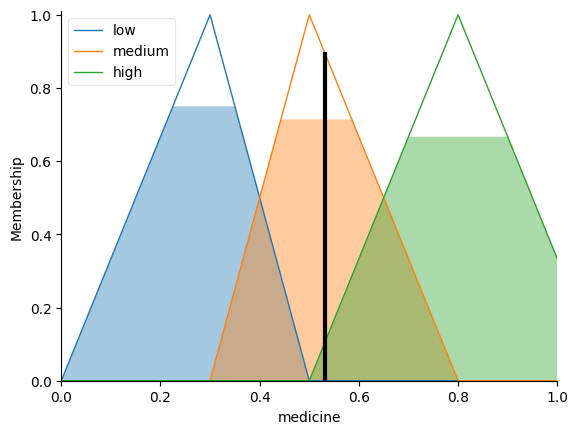

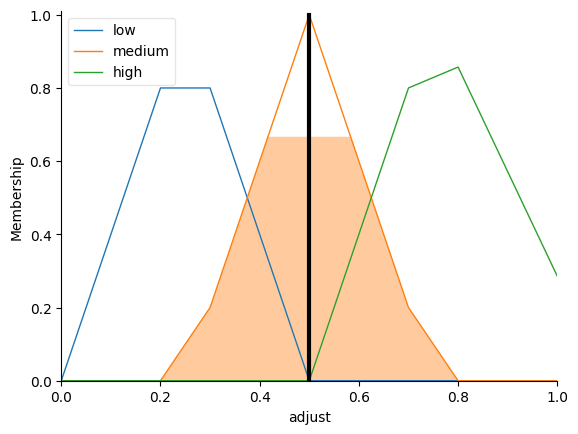

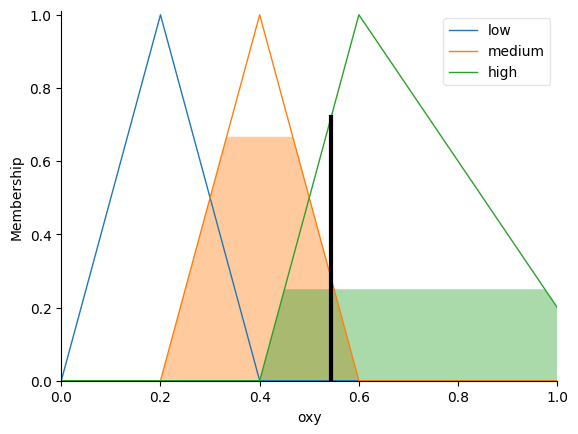

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['heart']=95
fuzzy_system.input['blood']=150
fuzzy_system.input['temperature']=37
fuzzy_system.input['oxygen']=0.8
fuzzy_system.input['blood_sugar']=90
fuzzy_system.compute()
print("Liều dùng thuốc:", fuzzy_system.output['medicine'])
print("Điều chỉnh dịch truyền tĩnh mạch:", fuzzy_system.output['adjust'])
print("Điều chỉnh oxy trong máu:", fuzzy_system.output['oxy'])
medicine.view(sim=fuzzy_system)
adjust.view(sim=fuzzy_system)
oxy.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
score=ctrl.Antecedent(np.arange(0,1.1,0.1),'score')
emotion=ctrl.Antecedent(np.arange(0,1.1,0.1),'emotion')
positive=ctrl.Antecedent(np.arange(0,10,0.1),'positive')
negative=ctrl.Antecedent(np.arange(0,10,0.1),'negative')

review=ctrl.Consequent(np.arange(0,1.1,0.1,),'review')

In [ ]:
score['low']=fuzz.trimf(score.universe,[0,0.15,0.3])
score['medium']=fuzz.trimf(score.universe,[0.15,0.3,0.7])
score['high']=fuzz.trimf(score.universe,[0.3,0.7,1.1])
emotion['low']=fuzz.trimf(emotion.universe,[0,0.2,0.5])
emotion['medium']=fuzz.trimf(emotion.universe,[0.2,0.5,0.8])
emotion['high']=fuzz.trimf(emotion.universe,[0.5,0.8,1.1])
positive['low']=fuzz.trimf(positive.universe,[0,1,2])
positive['medium']=fuzz.trimf(positive.universe,[1,2,5])
positive['high']=fuzz.trimf(positive.universe,[2,5,10])
negative['low']=fuzz.trimf(negative.universe,[0,1,2])
negative['medium']=fuzz.trimf(negative.universe,[1,2,5])
negative['high']=fuzz.trimf(negative.universe,[2,5,10])
review['low']=fuzz.trimf(review.universe,[0,0.2,0.5])
review['medium']=fuzz.trimf(review.universe,[0.2,0.5,0.8])
review['high']=fuzz.trimf(review.universe,[0.5,0.8,1.1])


In [ ]:
rule1 = ctrl.Rule(score['low'] & emotion['high'], review['low'])
rule2 = ctrl.Rule(score['low'] & emotion['low'], review['medium'])
rule3 = ctrl.Rule(score['medium'] & emotion['medium'], review['medium'])
rule4 = ctrl.Rule(score['high'] & emotion['high'], review['high'])

rule5 = ctrl.Rule(positive['high'] & negative['low'], review['high'])
rule6 = ctrl.Rule(positive['low'] & negative['high'], review['low'])
rule7 = ctrl.Rule(positive['medium'] & negative['medium'], review['medium'])

rule8 = ctrl.Rule(score['low'] & negative['high']&emotion['high'], review['low'])
rule9 = ctrl.Rule(score['medium'] & emotion['medium']&positive['medium'], review['medium'])
rule10 = ctrl.Rule(score['high'] & positive['high']&emotion['high'], review['high'])




Phân loại cảm xúc: 0.735167735899492


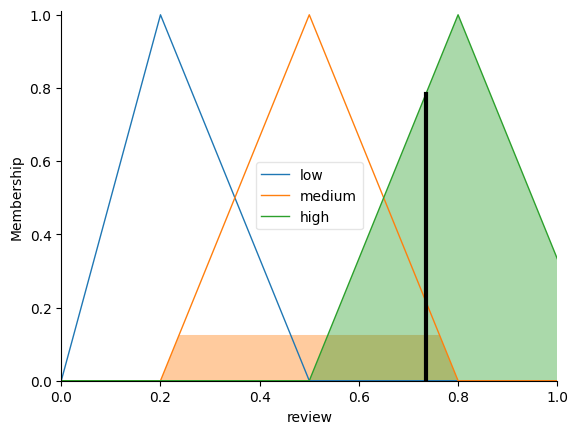

In [ ]:
control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['score']=0.65
fuzzy_system.input['emotion']=0.7
fuzzy_system.input['positive']=5
fuzzy_system.input['negative']=1
fuzzy_system.compute()
print("Phân loại cảm xúc:", fuzzy_system.output['review'])
review.view(sim=fuzzy_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind=ctrl.Antecedent(np.arange(0.7, 3.2, 0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4, 40.3, 0.1),'temperature')

rainfall=ctrl.Consequent(np.arange(0.2, 9.2, 0.1),'rainfall')

In [ ]:
wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

In [ ]:
rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_high'])
rule6 = ctrl.Rule(wind['low'] & temperature['very_high'], rainfall['normal'])
rule7 = ctrl.Rule(wind['high'] & temperature['low'], rainfall['low'])
rule8 = ctrl.Rule(wind['normal'] & temperature['very_low'], rainfall['low'])
rule9 = ctrl.Rule(wind['very_high'] & temperature['normal'], rainfall['high'])
rule10 = ctrl.Rule(wind['very_low'] & temperature['high'], rainfall['normal'])


4.700000000000002


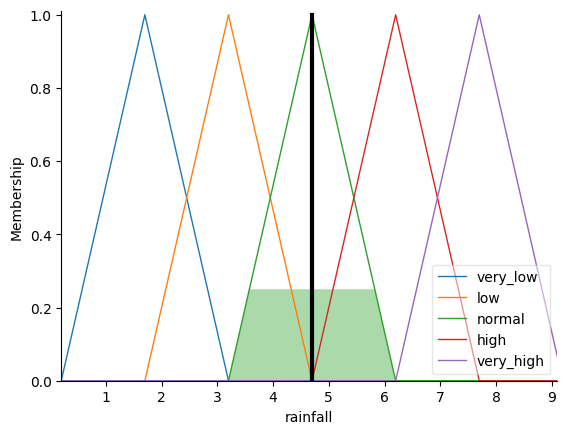

In [ ]:
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)